<a href="https://colab.research.google.com/github/JordaoGu/GSAutoML/blob/main/GS_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Global Solution 1 - AutoML
####RM93821 - Gustavo Jordão Santos 
####RM94381 - Rafael Silva 




In [ ]:
!pip install pandas
!pip install matplotlib
!pip install pycaret

In [3]:
# Importar as dependências
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *

# Carregar os dados do arquivo CSV
url = "https://dados.agricultura.gov.br/dataset/58bdc09c-9778-42b9-8fce-7d5c2c4fa211/resource/b89ffa6b-cf9a-4fb6-9f94-c9fcbfc0a6d7/download/imoveis_cadastrados_por_municipio.csv"

# Carregar os dados do arquivo CS"
df = pd.read_csv(url, delimiter=';', engine='python')

# Remover a coluna original
df.drop(columns=['municipio'], inplace=True)

# Corrigir tipos de dados
df['codigo_ibge'] = df['codigo_ibge'].astype(int)
df['numero_de_cadastros'] = df['numero_de_cadastros'].astype(int)
df['area_cadastrada'] = df['area_cadastrada'].astype(float)

# Visualizar os primeiros registros
print(df.head())

   uf  codigo_ibge  numero_de_cadastros  area_cadastrada
0  SP      3556958                  203        4804.3640
1  MG      3138609                 1838       77306.1967
2  PI      2201101                 1416       79895.9621
3  SP      3554201                  574       30527.3497
4  BA      2932309                  217        6755.2394


In [4]:
# Verificar informações gerais sobre o dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uf                   5560 non-null   object 
 1   codigo_ibge          5560 non-null   int64  
 2   numero_de_cadastros  5560 non-null   int64  
 3   area_cadastrada      5560 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 173.9+ KB
None


In [5]:
# Realizar estatísticas descritivas
print(df.describe())

        codigo_ibge  numero_de_cadastros  area_cadastrada
count  5.560000e+03          5560.000000     5.560000e+03
mean   3.253446e+06          1230.054137     1.132314e+05
std    9.851476e+05          1305.461562     3.289472e+05
min    1.100015e+06             1.000000     4.710000e-02
25%    2.512067e+06           454.000000     1.591042e+04
50%    3.146156e+06           845.000000     3.310923e+04
75%    4.119164e+06          1538.000000     8.220306e+04
max    5.300108e+06         19220.000000     7.300255e+06


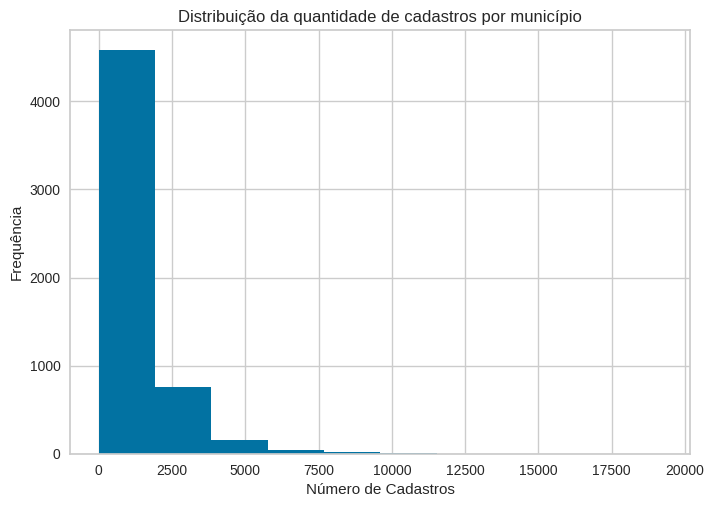

In [6]:
# Explorar distribuição das variáveis

# Exemplo: Histograma da quantidade de cadastros por município
plt.hist(df['numero_de_cadastros'], bins=10)
plt.xlabel('Número de Cadastros')
plt.ylabel('Frequência')
plt.title('Distribuição da quantidade de cadastros por município')
plt.show()

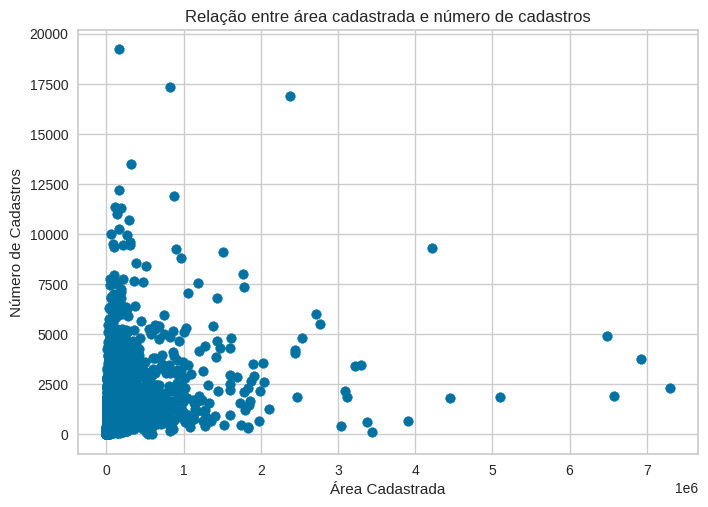

In [7]:
# Exemplo: Gráfico de dispersão entre área cadastrada e número de cadastros
plt.scatter(df['area_cadastrada'], df['numero_de_cadastros'])
plt.xlabel('Área Cadastrada')
plt.ylabel('Número de Cadastros')
plt.title('Relação entre área cadastrada e número de cadastros')
plt.show()

In [8]:
# Modelagem utilizando PyCaret

# Criar uma cópia dos dados para o PyCaret
data = df.copy()

# Inicializar o ambiente do PyCaret
regression_setup = setup(data=data, target='numero_de_cadastros')

# Selecionar um modelo de regressão
regression_model = create_model('lr')  # lr = Linear Regression

# Treinar o modelo
trained_model = finalize_model(regression_model)

# Avaliar o desempenho do modelo
evaluate_model(trained_model)

# Fazer previsões
predictions = predict_model(trained_model)

# Exibir as previsões
print(predictions)

# Opcional: Ajustar hiperparâmetros do modelo
tuned_model = tune_model(regression_model)

# Fazer previsões com o modelo ajustado
tuned_predictions = predict_model(tuned_model)

# Exibir as previsões do modelo ajustado
print(tuned_predictions)

,Description,Value
0,Session id,8901
1,Target,numero_de_cadastros
2,Target type,Regression
3,Original data shape,"(5560, 4)"
4,Transformed data shape,"(5560, 4)"
5,Transformed train set shape,"(3891, 4)"
6,Transformed test set shape,"(1669, 4)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,685.8920,1446335.1660,1202.6368,0.2754,0.9911,2.9193
1,705.6118,1040047.0118,1019.8270,0.2460,1.0305,2.2126
2,805.2013,1698404.6216,1303.2285,0.2106,0.9685,3.1557
3,731.1821,1205745.7224,1098.0645,0.1291,0.9699,2.0024
4,704.1487,1114189.6364,1055.5518,0.0847,1.0966,4.7064
5,731.6576,1420600.3398,1191.8894,0.1154,0.8583,1.1966
6,702.6502,1140317.9926,1067.8567,0.1748,0.9784,2.5209
7,790.5271,1741299.0156,1319.5829,0.1746,0.9718,1.8286
8,699.0989,1057986.8718,1028.5849,0.2186,0.8766,1.4142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,715.6435,1354983.8436,1164.0377,0.2146,0.9993,3.4822


      uf  codigo_ibge  area_cadastrada  numero_de_cadastros  prediction_label
3392  SC      4218954     34210.937500                  718       1276.745177
5065  BA      2927903     23629.791016                  170       2361.399100
1362  BA      2925105     52063.496094                 2915       2386.835093
1119  CE      2311355     38614.378906                 2479       1596.543502
430   BA      2928950     17249.041016                 1545       2355.702748
...   ..          ...              ...                  ...               ...
1918  TO      1718451     36224.824219                  217        556.305709
2177  MG      3123528     20667.062500                 1037       1071.624014
625   MG      3133758     15494.815430                  381       1067.268150
4878  GO      5210307     55335.023438                  391        837.025942
49    MG      3139508     17423.714844                  980       1069.159328

[1669 rows x 5 columns]


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,687.0786,1443963.4897,1201.6503,0.2766,0.9960,2.9639
1,707.3654,1040316.1322,1019.9589,0.2458,1.0351,2.2533
2,803.6220,1701435.6706,1304.3909,0.2092,0.9715,3.2437
3,732.2070,1204516.5097,1097.5047,0.1300,0.9734,2.0249
4,706.0416,1114015.6956,1055.4694,0.0848,1.1013,4.7609
5,733.2505,1419476.8889,1191.4180,0.1161,0.8614,1.2139
6,701.3344,1134404.1371,1065.0841,0.1791,0.9791,2.5400
7,792.4811,1740762.3825,1319.3795,0.1749,0.9766,1.8676
8,702.0199,1060975.5554,1030.0367,0.2164,0.8808,1.4415


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,715.7818,1352756.2871,1163.0805,0.2159,1.0025,3.5058


      uf  codigo_ibge  area_cadastrada  numero_de_cadastros  prediction_label
3392  SC      4218954     34210.937500                  718       1239.972658
5065  BA      2927903     23629.791016                  170       2344.522648
1362  BA      2925105     52063.496094                 2915       2370.094100
1119  CE      2311355     38614.378906                 2479       1627.886957
430   BA      2928950     17249.041016                 1545       2338.778521
...   ..          ...              ...                  ...               ...
1918  TO      1718451     36224.824219                  217        642.626366
2177  MG      3123528     20667.062500                 1037       1085.093849
625   MG      3133758     15494.815430                  381       1080.310288
4878  GO      5210307     55335.023438                  391        773.634075
49    MG      3139508     17423.714844                  980       1081.964377

[1669 rows x 5 columns]


In [9]:
best_model = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,602.8812,1016963.7435,1002.7529,0.3947,0.7574,1.1085,0.2980
lightgbm,Light Gradient Boosting Machine,613.3392,1078114.4052,1033.0780,0.3560,0.7351,1.0148,0.2840
knn,K Neighbors Regressor,636.5904,1180529.1895,1080.8820,0.2957,0.7905,1.2214,0.0730
xgboost,Extreme Gradient Boosting,642.3856,1175998.9148,1080.4471,0.2913,0.7780,1.0718,0.2380
rf,Random Forest Regressor,643.0683,1157830.9089,1070.7127,0.3052,0.7604,1.0512,0.6670
et,Extra Trees Regressor,677.3276,1307191.8448,1138.4581,0.2139,0.7891,1.1158,0.6930
huber,Huber Regressor,695.4680,1467320.4865,1202.6443,0.1307,0.9153,1.8850,0.1510
br,Bayesian Ridge,735.4860,1382556.4521,1168.7283,0.1782,0.9798,2.4983,0.0720
lasso,Lasso Regression,735.5379,1382612.5944,1168.7651,0.1781,0.9795,2.4955,0.0680
ridge,Ridge Regression,735.5379,1382612.6408,1168.7651,0.1781,0.9795,2.4955,0.0680


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [10]:
# Instalar o Streamlit
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=901670abf46cd4c94fd9a7a8bbd7708278da0875d95db5a2dcb21e2a008a8346
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [11]:
import streamlit as st

In [12]:
# Título do webapp
st.title("Webapp de Previsão")

# Descrição do webapp
st.write("Insira os dados necessários para fazer a previsão.")

# Campos de entrada
input1 = st.number_input("Código IBGE")
input2 = st.number_input("Área Cadastrada")

2023-06-06 23:24:04.235 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [13]:
# Botão de predição
if st.button("Fazer Previsão"):
    prediction = fazer_previsao(input1, input2)
    st.success("Previsão: {}".format(prediction))